In [419]:
from bs4 import BeautifulSoup
import requests
from api import baidu_api, gaode_api
import json
import math
url1 = 'https://movie.douban.com/subject/26931786/?from=showing'
url2 = 'https://dt.8684.cn/bj_x_6c955cb5'
url3 = 'https://dt.8684.cn/bj'
r = requests.get(url3)
r.encoding = 'utf-8'

In [417]:
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d

In [421]:
def geo_distance_new(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) ** 2 +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) ** 2)
    c = 2 * math.asin(math.sqrt(a))
    d = radius * c * 1000
    return d

In [2]:
soup2 = BeautifulSoup(r.text)

In [3]:
import re
metro_map = {}
for link in soup2.find_all(class_ = "sLink"):
#     print(link)
#     print(dir(link))
#     print(type(link.text))
    a = link.text.split()
    metro_map[a[0]] = a[1:]
#     print(type(link))
#     print(link.get('href'))

In [ ]:
len(metro_map)
# metro_map['北京地铁1号线']
metro_map

In [5]:
'地铁线'.split('线')

['地铁', '']

In [6]:
metro_map['北京地铁4号线']

['安河桥北',
 '北宫门',
 '西苑',
 '圆明园',
 '北京大学东门',
 '中关村',
 '海淀黄庄',
 '人民大学',
 '魏公村',
 '国家图书馆',
 '动物园',
 '西直门',
 '新街口',
 '平安里',
 '西四',
 '灵境胡同',
 '西单',
 '宣武门',
 '菜市口',
 '陶然亭',
 '北京南站',
 '马家堡',
 '角门西',
 '公益西桥',
 '新宫',
 '西红门',
 '高米店北',
 '高米店南',
 '枣园',
 '清源路',
 '黄村西大街',
 '黄村火车站',
 '义和庄',
 '生物医药基地',
 '天宫院']

## 百度地图API：`http://api.map.baidu.com/geocoding/v3/?address=北京市海淀区上地十街10号&output=json&ak=您的ak&callback=showLocation`
### 不好用，返回的经纬度误差巨大

In [7]:
def get_geoinfo_baidu(address):
    url = 'http://api.map.baidu.com/geocoding/v3/?'
    api = baidu_api
    uri = url + 'address=' + address + '&output=json&ak=' + api
    r = requests.get(uri)
    result = json.loads(r.text)['result']['location']
    if result:
        return result['lat'], result['lng']
    return None

## 高德API: `https://restapi.amap.com/v3/geocode/geo?address=北京市朝阳区阜通东大街6号&output=XML&key=<用户的key>`

In [8]:
def get_geoinfo_gaode(address):
    output_type = json
    uri = f"https://restapi.amap.com/v3/geocode/geo?address={address}&output={output_type}&key={gaode_api}"
    r = requests.get(uri).text
    result = json.loads(r)['geocodes'][0]['location']
    lng, lat = result.split(',')
    return float(lat), float(lng)

In [9]:
get_geoinfo_gaode('北京地铁4号线角门西')

(39.846306, 116.37088)

In [10]:
# not precise result
get_geoinfo_gaode('北京地铁生物医药基地地铁站')

(39.68651, 116.321662)

In [11]:
# not precise result
get_geoinfo_baidu('北京地铁生物医药基地地铁站')

(39.507913928689426, 116.32222095905401)

In [12]:
get_geoinfo_gaode('北京地铁4号线西红门地铁站')

(39.7898, 116.328689)

In [13]:
get_geoinfo_gaode('北京地铁西红门地铁站')

(39.90403, 116.407526)

In [14]:
get_geoinfo_baidu('北京地铁1号线四惠')

(39.91166587774982, 116.51463108233885)

In [321]:
get_geoinfo_gaode('北京地铁1号线四惠')

(39.91029, 116.49567)

In [325]:
'S2' in 'beijgsS2'

True

In [210]:
list(metro_map.keys())

['北京地铁1号线',
 '北京地铁2号线外环',
 '北京地铁4号线',
 '北京地铁5号线',
 '北京地铁6号线',
 '北京地铁7号线',
 '北京地铁8号线南',
 '北京地铁8号线北',
 '北京地铁9号线',
 '北京地铁10号线外环',
 '北京地铁13号线',
 '北京地铁14号线东段',
 '北京地铁14号线（西段）',
 '北京地铁15号线',
 '北京地铁16号线',
 '北京地铁S1号线',
 '北京地铁S2号线',
 '北京地铁八通线',
 '北京地铁昌平线',
 '北京地铁房山线',
 '北京地铁机场线',
 '北京地铁西郊线',
 '北京地铁燕房线',
 '北京地铁亦庄线',
 '北京地铁3号线(未开通)',
 '北京地铁11号线(未开通)',
 '北京地铁12号线(未开通)']

## 未开通及S2号线未列入地图

In [422]:
with open('Beijing_metro_geoinfo_backup.json', 'r', encoding='utf-8') as f:
    metro_map_new = json.load(f)
metro_4 = metro_map_new['北京地铁10号线']
result = zip_station(metro_4)
metro_4
# result.append(('苏州街', '巴沟'))
# print(result)
geo_distance(metro_4['巴沟'], metro_4['农业展览馆'])

15.082080295758272

In [412]:
import networkx as nx
station = nx.Graph()
station.add_nodes_from(list(metro_4.keys()))
# station.add_edges_from(result)
station.add_cycle(list(metro_4.keys()))

C:\Users\Administrator\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


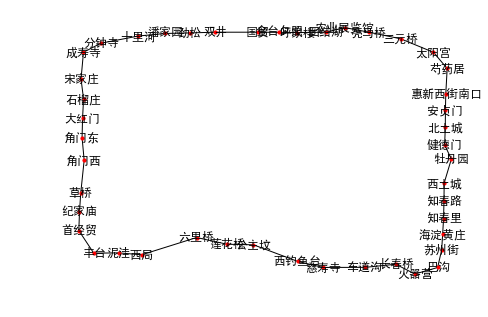

In [413]:
nx.draw(station, metro_4, with_labels = True, node_size=10)

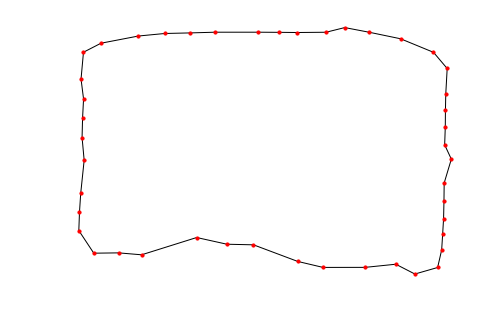

In [414]:
nx.draw(station, metro_4, with_labels = False, node_size=10)

In [300]:
x, y = [], []
for e in list(metro_4.values()):
    lat, lng = e
    x.append(lat)
    y.append(lng)

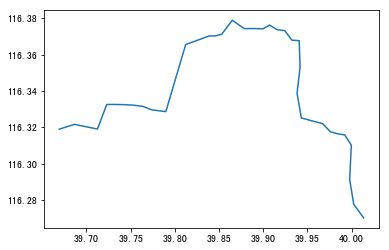

In [301]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y)

In [259]:
# from geopy.geocoders import Nominatim
# s = Nominatim().geocode('北京地铁4号线角门西')
# 不理想

In [ ]:
metro_4_connected = list()
station1 = list(metro_4.keys())
station2 = list(metro_4.keys())
station2.pop(0)
result = list(zip(station1, station2))
result

In [18]:
def get_metro_map(url):
    metro_map = {}
    response = requests.get(url)
    response.encoding = 'utf-8'
    soup_content = BeautifulSoup(response.text, features="lxml")
    for link in soup_content.find_all(class_='sLink'):
        temp = link.text.split()
        if '未开通' in temp[0]:
            continue
        temp[0] = temp[0].split('线')[0] + '线'
        metro_map[temp[0]] = temp[1:]
    return metro_map


def get_geoinfo_gaode(address):
    output_type = json
    uri = f"https://restapi.amap.com/v3/geocode/geo?address={address}&output={output_type}&key={gaode_api}"
    r = requests.get(uri).text
    result = json.loads(r)['geocodes'][0]['location']
    lng, lat = result.split(',')
    return float(lat), float(lng)


def get_single_line_geoinfo(metro_line, stations):
    metro_geoinfo = {}
    for station in stations:
        metro_geoinfo[station] = get_geoinfo_gaode(metro_line + station + '地铁站')
    return metro_geoinfo


def get_all_line_geoinfo(metro_map):
    metro_line_geoinfo = {}
    for metro_line, stations in metro_map.items():
        line_info = get_single_line_geoinfo(metro_line, metro_map[metro_line])
        metro_line_geoinfo[metro_line] = line_info
    return metro_line_geoinfo

In [19]:
def zip_station(metro_line):
    connected_station = []
    station1 = list(metro_line.keys())
    station2 = list(metro_line.keys())
    station2.pop(0)
    result = list(zip(station1, station2))
    return result

In [22]:
zip_station(metro_map_new['北京地铁八通线'])

[('四惠', '四惠东'),
 ('四惠东', '高碑店'),
 ('高碑店', '传媒大学'),
 ('传媒大学', '双桥'),
 ('双桥', '管庄'),
 ('管庄', '八里桥'),
 ('八里桥', '通州北苑'),
 ('通州北苑', '果园'),
 ('果园', '九棵树'),
 ('九棵树', '梨园'),
 ('梨园', '临河里'),
 ('临河里', '土桥')]

In [431]:
METRO = nx.Graph()
# 存放所有站点经纬度的信息
station_nodes_dict = {}
# metro_map_new.pop('北京地铁S2号线')
for metro, stations in metro_map_new.items():
    for k,v in stations.items():
        station_nodes_dict[k] = v
    if metro == '北京地铁2号线':
#         temp = zip_station(metro_map_new[metro])
#         temp.append(('积水潭', '西直门'))
#         station_nodes.add_edges_from(temp)
        METRO.add_cycle(stations.keys())
    elif metro == '北京地铁10号线':
#         temp = zip_station(metro_map_new[metro])
#         temp.append(('苏州街', '巴沟'))
#         station_nodes.add_edges_from(temp)
        METRO.add_cycle(stations.keys())
    else:
        METRO.add_edges_from(zip_station(metro_map_new[metro]))
    METRO.add_nodes_from(stations.keys()) 

In [432]:
geo_distance(station_nodes_dict['苹果园'], station_nodes_dict['苏庄'])

22.984925096358474

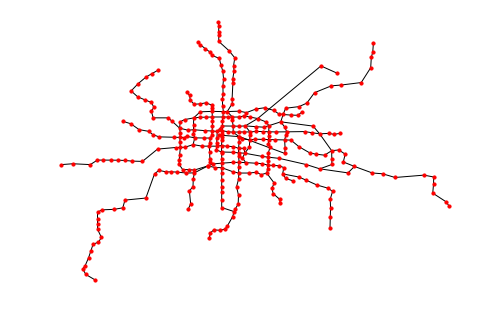

In [435]:
METRO.add_edge('阎村东', '苏庄')
nx.draw(METRO, station_nodes_list, with_labels = False, node_size=10)

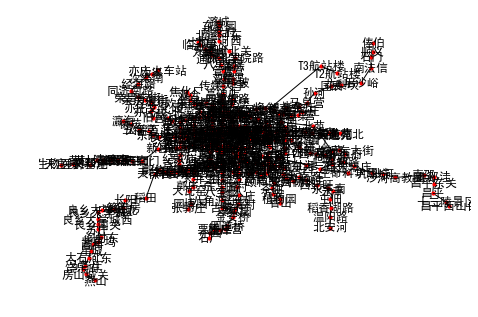

In [436]:
nx.draw(METRO, station_nodes_list, with_labels = True, node_size=10)

## 部分站点的经纬度需要手动修正

In [ ]:
dir(station_nodes)

In [437]:
a = METRO['西直门']
for x in a.keys():
    print(x)
#     print(type(x))

车公庄
积水潭
动物园
新街口
大钟寺


In [438]:
METRO.degree

DegreeView({'苹果园': 3, '古城': 2, '八角游乐园': 2, '八宝山': 2, '玉泉路': 2, '五棵松': 2, '万寿路': 2, '公主坟': 4, '军事博物馆': 4, '木樨地': 2, '南礼士路': 2, '复兴门': 4, '西单': 4, '天安门西': 2, '天安门东': 2, '王府井': 2, '东单': 4, '建国门': 4, '永安里': 2, '国贸': 4, '大望路': 4, '四惠': 2, '四惠东': 2, '西直门': 5, '车公庄': 4, '阜成门': 2, '长椿街': 2, '宣武门': 4, '和平门': 2, '前门': 2, '崇文门': 4, '北京站': 2, '朝阳门': 4, '东四十条': 2, '东直门': 4, '雍和宫': 4, '安定门': 2, '鼓楼大街': 4, '积水潭': 2, '安河桥北': 1, '北宫门': 2, '西苑': 3, '圆明园': 2, '北京大学东门': 2, '中关村': 2, '海淀黄庄': 4, '人民大学': 2, '魏公村': 2, '国家图书馆': 3, '动物园': 2, '新街口': 2, '平安里': 4, '西四': 2, '灵境胡同': 2, '菜市口': 4, '陶然亭': 2, '北京南站': 3, '马家堡': 2, '角门西': 4, '公益西桥': 2, '新宫': 2, '西红门': 2, '高米店北': 2, '高米店南': 2, '枣园': 2, '清源路': 2, '黄村西大街': 2, '黄村火车站': 2, '义和庄': 2, '生物医药基地': 2, '天宫院': 1, '宋家庄': 4, '刘家窑': 2, '蒲黄榆': 4, '天坛东门': 2, '磁器口': 4, '灯市口': 2, '东四': 4, '张自忠路': 2, '北新桥': 2, '和平里北街': 2, '和平西桥': 2, '惠新西街南口': 4, '惠新西街北口': 2, '大屯路东': 4, '北苑路北': 2, '立水桥南': 2, '立水桥': 4, '天通苑南': 2, '天通苑': 2, '天通苑北': 1, '金安桥': 2, '杨庄': 2, '西黄村': 2, '廖公庄': 2, '田村':

In [449]:
def get_related_stations(station):
    station = METRO[station]
    return [x for x in station.keys()]

In [451]:
get_related_stations('角门西')

['马家堡', '公益西桥', '草桥', '角门东']

In [453]:
for x in METRO['西直门'].keys():
    print(x)

车公庄
积水潭
动物园
新街口
大钟寺


In [471]:
# Return a found way from start to destination in a certain way.
def search(start, destination, METRO_GRAPH, sort_candidate=shortest_path_first):
    paths = [[start]]
    
    visitied = set()
    
    while paths: # if we find existing pathes
        path = paths.pop(0)
        frontier = path[-1]
        
        if frontier in visitied: continue
        
        for city in METRO_GRAPH[frontier].keys():
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]

            paths.append(new_path)
            
            if city == destination: 
                return '->'.join(new_path)
        
        visitied.add(frontier)
        
        paths = sort_candidate(paths) # 我们可以加一个排序函数 对我们的搜索策略进行控制
    return f"No way from {start} to {destination}."

In [472]:
def transfer_stations_first(paths): 
    return sorted(paths, key=len)

In [473]:
def transfer_as_much_possible(paths):
    return sorted(paths, key=len, reverse=True)

In [474]:
def shortest_path_first(paths):
    
    if len(paths) <= 1: return paths
    
    def get_path_distnace(path):
        distance = 0
        for i in range(1, len(path)):
            distance += geo_distance(path[i-1], path[i])
            
        return distance

    return sorted(paths, key=get_path_distnace)

In [475]:
search('苹果园', '公益西桥', METRO, transfer_stations_first)

'苹果园->古城->八角游乐园->八宝山->玉泉路->五棵松->万寿路->公主坟->莲花桥->六里桥->西局->泥洼->丰台->首经贸->纪家庙->草桥->角门西->公益西桥'

In [ ]:
## 